In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import resnet18, ResNet18_Weights
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch import nn, optim
from sklearn.metrics import accuracy_score

**PART 1 - TESNORS, INTRO TO AUTOGRAD, NEURAL NETWORKS TRAINING A CLASSIFIER**

**Tensors**

In [2]:
data = [[2, 4], [6, 8]]
x_data = torch.tensor(data)

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [4]:
x_ones = torch.ones_like(x_data) # it retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4245, 0.5082],
        [0.3215, 0.9584]]) 



In [5]:
shape = (3, 4,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.1687, 0.3955, 0.1308, 0.5649],
        [0.1240, 0.1662, 0.5230, 0.5507],
        [0.1992, 0.3208, 0.2103, 0.4579]]) 

Ones Tensor: 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [6]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [7]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

In [8]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [9]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [10]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [11]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [12]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [13]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [14]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


**A GENTLE INTRODUCTION TO TORCH.AUTOGRAD**

In [15]:
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 68.1MB/s]


In [16]:
prediction = model(data) # forward pass

In [17]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

In [18]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.8)

In [19]:
optim.step() #gradient descent

In [20]:
a = torch.tensor([3., 3.], requires_grad=True)
b = torch.tensor([6., 6.], requires_grad=True)

In [21]:
Q = 6*a**3 - b**2

In [22]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [23]:
# check if collected gradients are correct
print(18*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [24]:
x = torch.rand(6, 6)
y = torch.rand(6, 6)
z = torch.rand((6, 6), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


In [25]:
model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

In [26]:
model.fc = nn.Linear(512, 10)

In [27]:
# Optimize only the classifier
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.6)

**NEURAL NETWORKS**

In [28]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [29]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [30]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0478, -0.1293, -0.0755, -0.0614, -0.0116,  0.0069, -0.0493,  0.0476,
          0.0715,  0.0832]], grad_fn=<AddmmBackward0>)


In [31]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [32]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.5757, grad_fn=<MseLossBackward0>)


In [33]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [34]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0020, -0.0069,  0.0045, -0.0080,  0.0032,  0.0021])


In [35]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

**PART 1 - TRAINING A CLASSIFIER**

In [36]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.25, 0.25, 0.25), (0.25, 0.25, 0.25))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 42788597.68it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


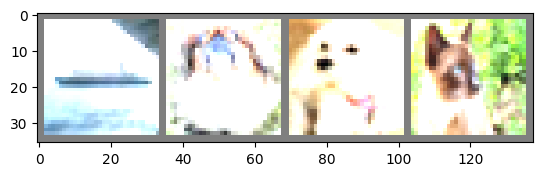

ship  dog   dog   cat  


In [37]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [38]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.002, momentum=0.6)

In [40]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.168
[1,  4000] loss: 1.915
[1,  6000] loss: 1.698
[1,  8000] loss: 1.604
[1, 10000] loss: 1.544
[1, 12000] loss: 1.490
[2,  2000] loss: 1.433
[2,  4000] loss: 1.404
[2,  6000] loss: 1.374
[2,  8000] loss: 1.372
[2, 10000] loss: 1.328
[2, 12000] loss: 1.308
Finished Training


In [41]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

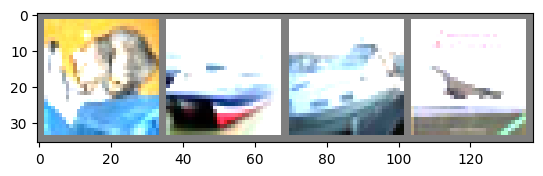

GroundTruth:  cat   ship  ship  plane


In [42]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [43]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [44]:
outputs = net(images)

In [45]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   ship  plane


In [46]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


In [47]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 60.4 %
Accuracy for class: car   is 75.1 %
Accuracy for class: bird  is 27.3 %
Accuracy for class: cat   is 36.6 %
Accuracy for class: deer  is 38.5 %
Accuracy for class: dog   is 53.7 %
Accuracy for class: frog  is 79.7 %
Accuracy for class: horse is 62.9 %
Accuracy for class: ship  is 57.1 %
Accuracy for class: truck is 39.7 %


In [48]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [49]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [50]:
inputs, labels = data[0].to(device), data[1].to(device)

In [51]:
del dataiter

**PART 2 - HYPERPARAMETERS TUNING**

**SET 1**

[1,  2000] loss: 2.350
[1,  4000] loss: 2.179
[1,  6000] loss: 2.206
[1,  8000] loss: 2.128
[1, 10000] loss: 2.140
[1, 12000] loss: 2.171
[2,  2000] loss: 2.289
[2,  4000] loss: 2.121
[2,  6000] loss: 2.144
[2,  8000] loss: 2.146
[2, 10000] loss: 2.075
[2, 12000] loss: 2.093
[3,  2000] loss: 2.091
[3,  4000] loss: 2.073
[3,  6000] loss: 2.078
[3,  8000] loss: 2.088
[3, 10000] loss: 2.093
[3, 12000] loss: 2.083
Finished Training
Accuracy of the network on the train images on the Training Set: 26 %


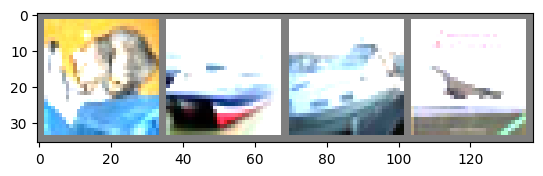

GroundTruth:  cat   ship  ship  plane
Predicted:  ship  ship  car   car  
Accuracy of the network on the 10000 test images on the Validation Set: 21 %


In [52]:
'''
Number of layers - 2
Number of nodes per layer - 3
Activation function - relu
Optimizer - SGD
Learning rate - 0.02
Accuracy on training set - 26%
Accuracy on validation set - 21%
epochs - 3
'''


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.02, momentum=0.9)

for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')
PATH = './cifar_net_path2_1.pth'
torch.save(net.state_dict(), PATH)

with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the train images on the Training Set: {100 * correct // total} %')


dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))
correct = 0
total = 0
with torch.no_grad():

    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images on the Validation Set: {100 * correct // total} %')

[1,  2000] loss: 2.017
[1,  4000] loss: 1.760
[1,  6000] loss: 1.672
[1,  8000] loss: 1.649
[1, 10000] loss: 1.622
[1, 12000] loss: 1.609
[2,  2000] loss: 1.556
[2,  4000] loss: 1.538
[2,  6000] loss: 1.539
[2,  8000] loss: 1.540
[2, 10000] loss: 1.538
[2, 12000] loss: 1.529
[3,  2000] loss: 1.477
[3,  4000] loss: 1.510
[3,  6000] loss: 1.508
[3,  8000] loss: 1.501
[3, 10000] loss: 1.495
[3, 12000] loss: 1.495
Finished Training
Accuracy of the network on the train images on the Training Set: 45 %


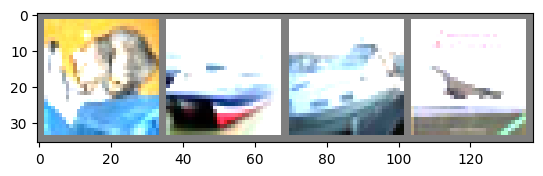

GroundTruth:  cat   ship  ship  plane
Predicted:  dog   ship  ship  plane
Accuracy of the network on the 10000 test images on the Validation Set: 47 %


In [53]:

'''
Number of layers - 4
Number of nodes per layer - 3
Activation function - tanh
Optimizer - SGD
Learning rate - 0.02
Accuracy on training set - 45%
Accuracy on validation set - 47%
epochs - 3
'''

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 100)
        self.fc3 = nn.Linear(100, 84)
        self.fc4 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.02, momentum=0.6)
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')
PATH = './cifar_net_path2_2.pth'
torch.save(net.state_dict(), PATH)
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the train images on the Training Set: {100 * correct // total} %')

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
net2 = Net()
net2.load_state_dict(torch.load(PATH))
outputs = net2(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images on the Validation Set: {100 * correct // total} %')

**SET 3**

[1,  2000] loss: 1.885
[1,  4000] loss: 1.582
[1,  6000] loss: 1.498
[1,  8000] loss: 1.460
[1, 10000] loss: 1.374
[1, 12000] loss: 1.382
[2,  2000] loss: 1.301
[2,  4000] loss: 1.286
[2,  6000] loss: 1.272
[2,  8000] loss: 1.235
[2, 10000] loss: 1.259
[2, 12000] loss: 1.277
[3,  2000] loss: 1.166
[3,  4000] loss: 1.164
[3,  6000] loss: 1.197
[3,  8000] loss: 1.177
[3, 10000] loss: 1.185
[3, 12000] loss: 1.175
Finished Training
Accuracy of the network on the train images on the Training Set: 59 %


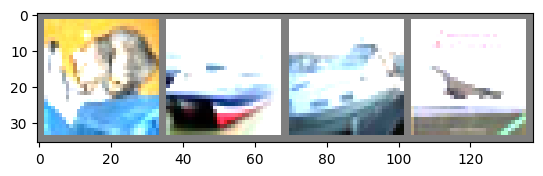

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   ship  truck ship 
Accuracy of the network on the 10000 test images on the Validation Set: 58 %


In [54]:
'''
Number of layers - 2
Number of nodes per layer - 3
Activation function - relu
Optimizer - adam
Learning rate - 0.002
Accuracy on training set - 59%
Accuracy on validation set - 58%
epochs - 3
'''


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')
PATH = './cifar_net_path2_3.pth'
torch.save(net.state_dict(), PATH)

with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the train images on the Training Set: {100 * correct // total} %')


dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))
correct = 0
total = 0
with torch.no_grad():

    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images on the Validation Set: {100 * correct // total} %')

**PART 3 - OPTUNA TUNING**

In [55]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.8 MB/s eta 0:00:00


In [56]:
import torch.nn as nn
import torch.optim as optim
import optuna

**Optuna tuning for validation set**

**OPTUNA TUNING FOR VALIDATION SET**

In [58]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=torch.flatten(x,1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

net=Net()

criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
for epoch in range(2):
    running_loss=0.0
    for i, data in enumerate(trainloader,0):
        inputs,labels=data
        optimizer.zero_grad()

        outputs=net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        if i%2000==1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss=0.0
print('Finished training')

def accuracy_score(training_data_loader):
    correct=0
    total=0
    with torch.no_grad():
        for data in training_data_loader:
            images,labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100 * correct // total

def objective(trial):
    lr = trial.suggest_float('lr', 0.001, 0.1)
    momentum= trial.suggest_float('momentum', 0.6, 0.9)
    criterion=nn.CrossEntropyLoss()
    optimizer=optim.SGD(net.parameters(),lr=lr,momentum=momentum)
    for epoch in range(1):
        running_loss=0.0
        for i, data in enumerate(trainloader,0):
            inputs,labels=data
            optimizer.zero_grad()

            outputs=net(inputs)
            loss=criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
            if i%2000==1999:
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss=0.0
    print('Finished training')

    score=accuracy_score(trainloader)
    return score

study = optuna.create_study()
study.optimize(objective, n_trials=2)

trial=study.best_trial
print('Accuracy:{}'.format(trial.value))
print('Best Params:{}'.format(trial.params))

[1,  2000] loss: 2.137
[1,  4000] loss: 1.741
[1,  6000] loss: 1.613
[1,  8000] loss: 1.533
[1, 10000] loss: 1.504
[1, 12000] loss: 1.445
[2,  2000] loss: 1.407
[2,  4000] loss: 1.372
[2,  6000] loss: 1.366
[2,  8000] loss: 1.353
[2, 10000] loss: 1.332
[2, 12000] loss: 1.316


[I 2023-10-03 01:17:26,876] A new study created in memory with name: no-name-c3e4fce2-6b1f-4c79-9587-5e2510e8b18b


Finished training
[1,  2000] loss: nan
[1,  4000] loss: nan
[1,  6000] loss: nan
[1,  8000] loss: nan
[1, 10000] loss: nan
[1, 12000] loss: nan
Finished training


[I 2023-10-03 01:19:45,238] Trial 0 finished with value: 10.0 and parameters: {'lr': 0.08491540456676507, 'momentum': 0.7062640727623196}. Best is trial 0 with value: 10.0.


[1,  2000] loss: nan
[1,  4000] loss: nan
[1,  6000] loss: nan
[1,  8000] loss: nan
[1, 10000] loss: nan
[1, 12000] loss: nan
Finished training


[I 2023-10-03 01:21:54,303] Trial 1 finished with value: 10.0 and parameters: {'lr': 0.03951880336198234, 'momentum': 0.8621200234018287}. Best is trial 0 with value: 10.0.


Accuracy:10.0
Best Params:{'lr': 0.08491540456676507, 'momentum': 0.7062640727623196}


**Accuracy**:10.0


**Best Params**:{'lr': 0.08491540456676507, 'momentum': 0.7062640727623196}

**OPTUNA Hypertuning for testing**

In [60]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=torch.flatten(x,1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

net=Net()

criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
for epoch in range(2):
    running_loss=0.0
    for i, data in enumerate(trainloader,0):
        inputs,labels=data
        optimizer.zero_grad()

        outputs=net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        if i%2000==1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss=0.0
print('Finished training')

def accuracy_score(training_data_loader):
    correct=0
    total=0
    with torch.no_grad():
        for data in training_data_loader:
            images,labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100 * correct // total

def objective(trial):
    lr = trial.suggest_float('lr', 0.001, 0.1)
    momentum= trial.suggest_float('momentum', 0.6, 0.9)
    criterion=nn.CrossEntropyLoss()
    optimizer=optim.SGD(net.parameters(),lr=lr,momentum=momentum)
    for epoch in range(1):
        running_loss=0.0
        for i, data in enumerate(testloader,0):
            inputs,labels=data
            optimizer.zero_grad()

            outputs=net(inputs)
            loss=criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
            if i%2000==1999:
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss=0.0
    print('Finished training on test data')

    score=accuracy_score(testloader)
    return score

study = optuna.create_study()
study.optimize(objective, n_trials=2)

trial=study.best_trial
print('Accuracy:{}'.format(trial.value))
print('Best Params:{}'.format(trial.params))

[1,  2000] loss: 2.146
[1,  4000] loss: 1.833
[1,  6000] loss: 1.671
[1,  8000] loss: 1.587
[1, 10000] loss: 1.555
[1, 12000] loss: 1.488
[2,  2000] loss: 1.418
[2,  4000] loss: 1.405
[2,  6000] loss: 1.416
[2,  8000] loss: 1.372
[2, 10000] loss: 1.378
[2, 12000] loss: 1.325


[I 2023-10-03 01:26:37,379] A new study created in memory with name: no-name-18f9f663-dc2d-439b-9122-301b7fc96a34


Finished training
[1,  2000] loss: 1137665.436
Finished training on test data


[I 2023-10-03 01:27:06,079] Trial 0 finished with value: 10.0 and parameters: {'lr': 0.04819241593990026, 'momentum': 0.8725409530421382}. Best is trial 0 with value: 10.0.


[1,  2000] loss: 2.315
Finished training on test data


[I 2023-10-03 01:27:32,006] Trial 1 finished with value: 10.0 and parameters: {'lr': 0.04894316973697676, 'momentum': 0.7665950703148285}. Best is trial 0 with value: 10.0.


Accuracy:10.0
Best Params:{'lr': 0.04819241593990026, 'momentum': 0.8725409530421382}


**Accuracy:**10.0

**Best Params:**{'lr': 0.04819241593990026, 'momentum': 0.8725409530421382}